<a href="https://colab.research.google.com/github/SowjanyaSadashivu/ML-final-project/blob/main/ML_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/datasets/')

Drive already mounted at /content/datasets/; to attempt to forcibly remount, call drive.mount("/content/datasets/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_data = pd.read_csv('/content/datasets/MyDrive/Datasets/translated_train_data')
test_data = pd.read_csv('/content/datasets/MyDrive/Datasets/translated_test_data')
val_data = pd.read_csv('/content/datasets/MyDrive/Datasets/translated_val_data')



In [ ]:
train_data

,texts,category
0,I have already reserved Mitsubishi Attrage aft...,1
1,Open a new era! Prime Minister gives a press c...,1
2,Can the membership card be discounted again?,1
3,Interested in new mazda2?,1
4,😍😍,0
...,...,...
21603,Saw the news that it was as toxic as heroin. W...,2
21604,with U BEER PRESENT “Thailand HipHop Festival ...,1
21605,eat now,1
21606,"Tonight, I intend to work hard to let ""I fall ...",2


In [ ]:
test_data

,texts,category
0,I bought only cold sanitary napkins. Like I ca...,2
1,Yes #phithanbkk,1
2,"Cursing is like relieving stress, but does BTS...",2
3,Cf clarins 5 bottles 2850,1
4,"You can eat it. MK soup is made from turnip, s...",1
...,...,...
2628,What time?,1
2629,Talk to each other… Clink glasses together… Sh...,1
2630,U beer girl from team,1
2631,Let's fight if we don't have a leader. Fightin...,0


In [ ]:
val_data

,texts,category
0,"Day 6/3/2018, are you in a bad mood? The food ...",2
1,"This brand, he likes to name, ending with Sa A...",0
2,The last two days! Anyone who is around Fashio...,1
3,Nong Saeng Som Yi Bo I think Nong Soda is good...,0
4,"Which airport is not expensive? Changi, Shake ...",1
...,...,...
2392,good day eh,0
2393,"Another voice. Garlic fried rice, not fragrant...",2
2394,"Like to ask for money for women to eat, want t...",0
2395,Chevrolet promotes global marketing drive orga...,1


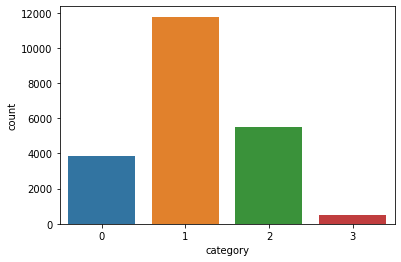

In [ ]:
sns.countplot(x = 'category', data = train_data)

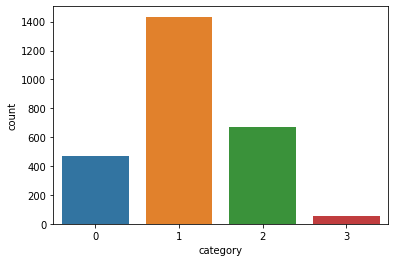

In [ ]:
sns.countplot(x = 'category', data = test_data)

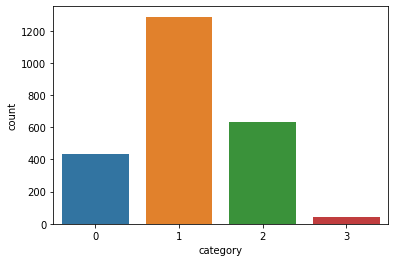

In [ ]:
sns.countplot(x = 'category', data = val_data)

4 types:
Positive = 0, Negative = 2, Neutral = 1, Quesion = 3

In [ ]:
import emoji
text = "game is on 😍 😍"
emoji.demojize(text, delimiters=("", "")) 

'game is on smiling_face_with_heart-eyes smiling_face_with_heart-eyes'

In [ ]:
train_data = train_data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
val_data = val_data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
test_data = test_data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))


In [ ]:
nan_value = float('NaN')
train_data.replace('', nan_value, inplace = True)
val_data.replace('', nan_value, inplace = True)
test_data.replace('', nan_value, inplace = True)

In [ ]:
train_data.isnull().sum()

texts       76
category     0
dtype: int64

In [ ]:
val_data.isnull().sum()

texts       7
category    0
dtype: int64

In [ ]:
test_data.isnull().sum()

texts       9
category    0
dtype: int64

In [ ]:
train_data.dropna(subset = ['texts'], inplace = True)
val_data.dropna(subset = ['texts'], inplace = True)
test_data.dropna(subset = ['texts'], inplace = True)

In [ ]:
def clean_data(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\d+','' ,text)
    text = re.sub(r'\n',' ',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    text = re.sub(r'\&\w*;', '', text)
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    text= ''.join(c for c in text if c <= '\uFFFF')
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    pattern = r'[^a-zA-z\s]'    
    text = re.sub(pattern, '', text)
    text = text.strip()
    return text

In [ ]:
train_data['texts'] = train_data['texts'].apply(clean_data)
test_data['texts'] = test_data['texts'].apply(clean_data)
val_data['texts'] = val_data['texts'].apply(clean_data)

In [ ]:
train_data

,texts,category
0,i have already reserved mitsubishi attrage aft...,1
1,open new era prime minister gives press confer...,1
2,can the membership card be discounted again,1
3,interested in new mazda,1
5,just like juke what kind of car is that stran...,0
...,...,...
21603,saw the news that it was as toxic as heroin wi...,2
21604,with beer present thailand hiphop festival th...,1
21605,eat now,1
21606,tonight intend to work hard to let i fall asle...,2


In [ ]:
count = train_data.groupby('category').count()
count

,texts
category,
0,3825
1,11749
2,5482
3,476


In [ ]:
#count of 0, 1, 2, 3 data in train_data set
text_pos_0 = train_data.loc[train_data['category'] == '0']
text_neu_1 = train_data.loc[train_data['category'] == '1']
text_neg_2 = train_data.loc[train_data['category'] == '2']
text_que_3 = train_data.loc[train_data['category'] == '3']
print(f'No of values in Positive category: {len(text_pos_0)}')
print(f'No of values in Neutral category: {len(text_neu_1)}')
print(f'No of values in Negative category: {len(text_neg_2)}')
print(f'No of values in Question category: {len(text_que_3)}')

No of values in Positive category: 3825
No of values in Neutral category: 11749
No of values in Negative category: 5482
No of values in Question category: 476


In [ ]:
x_train = train_data['texts']
y_train = train_data['category']
x_val = val_data['texts']
y_val = val_data['category']
x_test = test_data['texts']
y_test = test_data['category']

In [ ]:
#calculate prior probability
def prior_probability(y_train):
    prob_of_class = {}
    for clas in np.unique(y_train):
        count = sum(y_train == clas)
        prob_of_class[clas] = count/y_train.size
    return prob_of_class 

In [ ]:
prior_prob = prior_probability(y_train)
print('Prior probability of class positive: ', prior_prob['0'])
print('Prior probability of class neutral: ', prior_prob['1'])
print('Prior probability of class negative: ', prior_prob['2'])
print('Prior probability of class question: ', prior_prob['3'])

Prior probability of class positive:  0.17764257848783208
Prior probability of class neutral:  0.5456529816087683
Prior probability of class negative:  0.2545978079138027
Prior probability of class question:  0.022106631989596878


In [ ]:
'''def tokenize(text):
    vocab = []
    word_frequency = {}
    for word in text.split(' '):
        if word not in word_frequency.keys():
            word_frequency[word] = 1
            vocab.append(word)
        else:
            word_frequency[word] += 1
        
    return vocab, word_frequency'''

"def tokenize(text):\n    vocab = []\n    word_frequency = {}\n    for word in text.split(' '):\n        if word not in word_frequency.keys():\n            word_frequency[word] = 1\n            vocab.append(word)\n        else:\n            word_frequency[word] += 1\n        \n    return vocab, word_frequency"

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words_list = list(stop_words_list)
stop_words_list.append(' ')
lists = ['those','the','a', 'on', 'own', 'yourselves', 'ie', 'around', 'between', 'four', 'been', 'alone', 'off', 'am', 'then', 'other', 'can', 'cry', 'regarding', 'hereafter', 'front', 'too', 'used', 
                   'wherein', 'doing', 'everything', 'up', 'never', 'onto', 'how','either', 'before', 'anyway', 'since', 'through', 'amount', 'now', 'he', 'cant', 'was', 'con', 'have', 'into', 'because', 
                   'inc', 'not', 'therefore', 'they', 'even', 'whom', 'it', 'see', 'somewhere', 'interest', 'thereupon', 'thick', 'nothing', 'whereas', 'much', 'whenever', 'find', 'seem', 'until', 
                   'whereby', 'at', 'ltd', 'fire', 'also', 'some', 'last', 'than', 'get', 'already', 'our', 'doesn', 'once', 'will', 'noone', 'that', 'what', 'thus', 'no', 'myself', 'out', 'next', 'whatever', 
                   'although', 'though', 'etc', 'which', 'would', 'therein', 'nor', 'somehow', 'whereupon', 'besides', 'whoever', 'thin', 'ourselves', 
                   'few', 'did', 'third', 'without', 'twelve', 'anything', 'against', 'while', 'twenty', 'if', 'however', 'found', 'herself', 'when', 'may', 'six', 'ours', 'done', 'seems', 'else', 'call', 'perhaps', 
                   'had', 'nevertheless', 'fill', 'where', 'otherwise', 'still', 'within', 'its', 'for', 'together', 'elsewhere', 'throughout','of', 'eg', 'others', 'show', 'sincere', 'anywhere', 'anyhow', 
                   'as', 'are', 'the', 'hence', 'something', 'hereby', 'nowhere', 'latterly', 'de', 'say', 'does', 'neither', 'his', 'go', 'forty', 'put', 'their', 'by', 'namely', 'km', 'could', 'five', 'unless', 
                   'itself', 'is', 'nine', 'whereafter', 'down', 'bottom', 'thereby', 'such', 'both', 'she', 'become', 'whole', 'who', 'yourself', 'every', 'thru', 'except', 'very', 'several', 'among', 'being', 
                   'be', 'mine', 'further', 'here', 'during', 'why', 'with', 'just', 'becomes', 'about', 'a', 'co', 'using', 'seeming', 'due', 'wherever', 'beforehand', 'detail', 'fifty', 'becoming', 'might', 
                   'amongst', 'my', 'empty', 'thence', 'thereafter', 'almost', 'least', 'someone', 'often', 'from', 'keep', 'him', 'or', 'top', 'her', 'didn', 'nobody', 'sometime', 'across', 'hundred', 'only', 
                   'via', 'name', 'eight', 'three', 'back', 'to', 'all', 'became', 'move', 'me', 'we', 'formerly', 'so', 'i', 'whence', 'describe', 'under', 'always', 'himself', 'more', 'herein', 'in', 'after', 'themselves', 
                   'you', 'them', 'above', 'sixty', 'hasnt', 'your', 'made', 'everywhere', 'indeed', 'most', 'kg', 'fifteen', 'but', 'must', 'along', 'beside', 'hers', 'computer', 'side', 'former', 'full', 'anyone', 'has', 'yours', 
                   'whose', 'behind', 'please', 'mill', 'amoungst', 'ten', 'seemed', 'sometimes', 'should', 'over', 'take', 'each', 'don', 'same', 'rather', 'really', 'latter', 'and', 'part', 'hereupon', 'per', 
                   'eleven', 'ever', 'enough', 'again', 'us', 'yet', 'moreover', 'mostly', 'one', 'meanwhile', 'whither', 'there', 'toward', 'give', 'system', 'do', 'quite', 'an', 'these', 'everyone', 'towards', 'this', 
                   'bill', 'cannot', 'un', 'afterwards', 'beyond', 'make', 'were', 'whether', 'well', 'another', 'below', 'first', 'upon', 'any', 'none', 'many', 'various', 'serious', 're', 'two', 'less', 'couldnt', 'so', 'didnt', '']


In [ ]:
stop_words_list = stop_words_list + lists
print(len(stop_words_list))
stop_words_list = set(stop_words_list)
print(len(stop_words_list))

522
393


In [ ]:
'''def remove_stop_words(vocab, word_frequency):
    for v in list(vocab):
        for w in stop_words_list:
          if w in word_frequency:
            del word_frequency[w]
            vocab.remove(w)
    return vocab, word_frequency'''

'def remove_stop_words(vocab, word_frequency):\n    for v in list(vocab):\n        for w in stop_words_list:\n          if w in word_frequency:\n            del word_frequency[w]\n            vocab.remove(w)\n    return vocab, word_frequency'

In [ ]:
'''def tokenize_all(data):
    vocab = []
    word_frequency = {}
    for i in range(len(data)):
        if (i % 100) == 0:
            print(i)
        for sentence in data:
            s = clean_data(sentence)
            for word in s.split(' '):
                word = word.lower()
                if word not in word_frequency.keys():
                  if len(word) > 4 and len(word) < 10:
                    word_frequency[word] = 1
                    vocab.append(word)
                else:
                    word_frequency[word] += 1
                
    return vocab, word_frequency'''

"def tokenize_all(data):\n    vocab = []\n    word_frequency = {}\n    for i in range(len(data)):\n        if (i % 100) == 0:\n            print(i)\n        for sentence in data:\n            s = clean_data(sentence)\n            for word in s.split(' '):\n                word = word.lower()\n                if word not in word_frequency.keys():\n                  if len(word) > 4 and len(word) < 10:\n                    word_frequency[word] = 1\n                    vocab.append(word)\n                else:\n                    word_frequency[word] += 1\n                \n    return vocab, word_frequency"

In [ ]:
'''def tokenize_data(data):
  vocab = []
  for i in range(len(data)):
    if (i % 100) == 0:
      print(i)
    for sentence in data:
      s = clean_data(sentence)
      for word in s.split(' '):
        word = word.lower()
        vocab.append(word)
  return vocab'''

"def tokenize_data(data):\n  vocab = []\n  for i in range(len(data)):\n    if (i % 100) == 0:\n      print(i)\n    for sentence in data:\n      s = clean_data(sentence)\n      for word in s.split(' '):\n        word = word.lower()\n        vocab.append(word)\n  return vocab"

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# tokenize the data, we get n rows where n is len of train data
def tokenize_data(data):
  vocab = data['texts'].apply(nltk.word_tokenize)
  return vocab

In [ ]:
#remove stop words, we get words list
def list_of_words(data):
  wordList = []
  for i in data:
    for j in i:
      if j not in stop_words_list:
        wordList.append(j)
  return wordList

In [ ]:
#word frequency
from collections import Counter
def word_frequency(data):
  counts = Counter(data)
  return counts


In [ ]:
token_train_data = tokenize_data(train_data) #n rows
vocab_train_data = list_of_words(token_train_data)# n words
wf_train_data = word_frequency(vocab_train_data)# word frequency


In [ ]:
print(f"Total no of lines tokenized in train_data : {len(token_train_data)}")
print(f"Total no of words tokenized in train_data : {len(vocab_train_data)}")
print(f"Total no of words frequencies in train_data : {len(wf_train_data)}")


Total no of lines tokenized in train_data : 21532
Total no of words tokenized in train_data : 219913
Total no of words frequencies in train_data : 20001


In [ ]:
positive_token = tokenize_data(text_pos_0)
positive_vocab = list_of_words(positive_token)
positive_wf = word_frequency(positive_vocab)

In [ ]:
print(f"Total no of lines tokenized in positive data : {len(positive_token)}")
print(f"Total no of words tokenized in positive data : {len(positive_vocab)}")
print(f"Total no of words frequencies in positive data : {len(positive_wf)}")


Total no of lines tokenized in positive data : 3825
Total no of words tokenized in positive data : 27088
Total no of words frequencies in positive data : 5631


In [ ]:
neutral_token = tokenize_data(text_neu_1)
neutral_vocab = list_of_words(neutral_token)
neutral_wf = word_frequency(neutral_vocab)

In [ ]:
print(f"Total no of lines tokenized in neutral data : {len(neutral_token)}")
print(f"Total no of words tokenized in neutral data : {len(neutral_vocab)}")
print(f"Total no of words frequencies in neutral data : {len(neutral_wf)}")

Total no of lines tokenized in neutral data : 11749
Total no of words tokenized in neutral data : 132826
Total no of words frequencies in neutral data : 16010


In [ ]:
negative_token = tokenize_data(text_neg_2)
negative_vocab = list_of_words(negative_token)
negative_wf = word_frequency(negative_vocab)

In [ ]:
print(f"Total no of lines tokenized in negative data : {len(negative_token)}")
print(f"Total no of words tokenized in negative data : {len(negative_vocab)}")
print(f"Total no of words frequencies in negative data : {len(negative_wf)}")


Total no of lines tokenized in negative data : 5482
Total no of words tokenized in negative data : 57557
Total no of words frequencies in negative data : 8449


In [ ]:
question_token = tokenize_data(text_que_3)
question_vocab = list_of_words(question_token)
question_wf = word_frequency(question_vocab)


In [ ]:
print(f"Total no of lines tokenized in question data : {len(question_token)}")
print(f"Total no of words tokenized in question data : {len(question_vocab)}")
print(f"Total no of words frequencies in question data : {len(question_wf)}")


Total no of lines tokenized in question data : 476
Total no of words tokenized in question data : 2442
Total no of words frequencies in question data : 1089


Conditional Probabiltity

In [ ]:
def con_prob(wf_0, wf_1, wf_2, wf_3):
  wf_0_p = {}
  wf_1_p = {}
  wf_2_p = {}
  wf_3_p = {}
  for word in wf_0:
    wf_0_p[word] = wf_0[word]/len(wf_0) #probability of word given positive

  for word in wf_1:
    wf_1_p[word] = wf_1[word]/len(wf_1) # probability of word given neutral

  for word in wf_2:
    wf_2_p[word] = wf_2[word]/len(wf_2) # probability of word given negative

  for word in wf_3:
    wf_3_p[word] = wf_3[word]/len(wf_3) # probability of word given question
  return wf_0_p, wf_1_p, wf_2_p, wf_3_p

In [ ]:
wf_0_pr, wf_1_pr, wf_2_pr, wf_3_pr = con_prob(positive_wf, neutral_wf, negative_wf, question_wf)

print('Probability of Positive word frequecy: ', wf_0_pr)
print('Probability of Neutral word frequecy: ', wf_1_pr)
print('Probability of Negative word frequecy: ', wf_2_pr)
print('Probability of Question word frequecy: ', wf_3_pr)



Probability of Positive word frequecy:  {'like': 0.08613034984904991, 'juke': 0.0001775883502042266, 'kind': 0.0019534718522464926, 'car': 0.025395134079204403, 'strange': 0.000887941751021133, 'shape': 0.0019534718522464926, 'chr': 0.002131060202450719, 'beautiful': 0.036760788492274904, 'extraordinary': 0.0001775883502042266, 'worth': 0.007636299058781744, 'perfect': 0.004439708755105665, 'lets': 0.06091280412004973, 'fight': 0.00834665245959865, 'hahahahahahahahahahahahahaha': 0.0001775883502042266, 'thank': 0.021133013674302967, 'want': 0.09021488190374712, 'push': 0.0012431184514295863, 'things': 0.003019001953471852, 'quickly': 0.004794885455514118, 'feel': 0.006925945657964837, 'uncomfortable': 0.0007103534008169064, 'alright': 0.0010655301012253596, 'darling': 0.0007103534008169064, 'watch': 0.0023086485526549456, 'dont': 0.027881370982063575, 'eat': 0.11294619072988812, 'thailand': 0.006038003906943704, 'correct': 0.0005327650506126798, 'im': 0.04333155744983129, 'starving': 0

In [ ]:
def tokenize_data_one(data):
  vocab = []
  for word in data.split(' '):
    vocab.append(word)
  return vocab

In [ ]:
def list_of_words_one(data):
  wordList = []
  for i in data:
    if i not in stop_words_list:
        wordList.append(i)
  return wordList


In [ ]:
def word_frequency_one(data):
  counts = Counter(data)
  return counts


In [ ]:
def accuracy(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if int(actual[i]) == int(predicted[i]):
      correct += 1
  return correct/float(len(actual)) * 100.0

In [ ]:
def fit(data):
  y_preds = []
  for s in data:
    token_data = tokenize_data_one(s) # n rows of tokenized data
    vocab = list_of_words_one(token_data) # n words after removing stop words
    word_freq = word_frequency_one(vocab) #word frequncy dictionary
  #conditional probability 
    wf_0_pr, wf_1_pr, wf_2_pr, wf_3_pr = con_prob(positive_wf, neutral_wf, negative_wf, question_wf)

    likelihood_0 = 1
    likelihood_1 = 1
    likelihood_2 = 1
    likelihood_3 = 1

    for word in vocab:
      if not word in wf_0_pr:
        wf_0_pr[word] = 0.0
      if not word in wf_1_pr:
        wf_1_pr[word] = 0.0
      if not word in wf_2_pr:
        wf_2_pr[word] = 0.0
      if not word in wf_3_pr:
        wf_3_pr[word] = 0.0

      likelihood_0 = likelihood_0 * wf_0_pr[word]
      likelihood_1 = likelihood_1 * wf_1_pr[word]
      likelihood_2 = likelihood_2 * wf_2_pr[word]
      likelihood_3 = likelihood_3 * wf_3_pr[word]
    
    posterior_0 = prior_prob['0'] * likelihood_0
    posterior_1 = prior_prob['1'] * likelihood_1
    posterior_2 = prior_prob['2'] * likelihood_2
    posterior_3 = prior_prob['3'] * likelihood_3
  
    if (posterior_0 > posterior_1) & (posterior_0 > posterior_2) & (posterior_0 > posterior_3):
      y_pred = 0
    elif (posterior_1 > posterior_0) & (posterior_1 > posterior_2) & (posterior_1 > posterior_3):
      y_pred = 1
    elif (posterior_2 > posterior_0) & (posterior_2 > posterior_1) & (posterior_2 > posterior_3):
      y_pred = 2
    elif (posterior_3 > posterior_0) & (posterior_3 > posterior_1) & (posterior_3 > posterior_2):
      y_pred = 3

    y_preds.append(y_pred)

  return y_preds
    


In [ ]:
model = fit(x_train)

In [ ]:
y_train = list(y_train)

In [ ]:
train_data_accuracy = accuracy(model, y_train)

In [ ]:
print('Accuracy of Train dataset is :', train_data_accuracy)

Accuracy of Train dataset is : 75.98922533903027


In [ ]:
def predict(data):
  pred = []
  for s in data:
    token_data = tokenize_data_one(s) # n rows of tokenized data
    vocab = list_of_words_one(token_data) # n words after removing stop words
    word_freq = word_frequency_one(vocab) #word frequncy dictionary
  
    likelihood_0 = 1
    likelihood_1 = 1
    likelihood_2 = 1
    likelihood_3 = 1

    for word in vocab:
      if not word in wf_0_pr:
        wf_0_pr[word] = 0.0
      if not word in wf_1_pr:
        wf_1_pr[word] = 0.0
      if not word in wf_2_pr:
        wf_2_pr[word] = 0.0
      if not word in wf_3_pr:
        wf_3_pr[word] = 0.0

      likelihood_0 = likelihood_0 * wf_0_pr[word]
      likelihood_1 = likelihood_1 * wf_1_pr[word]
      likelihood_2 = likelihood_2 * wf_2_pr[word]
      likelihood_3 = likelihood_3 * wf_3_pr[word]

    posterior_0 = prior_prob['0'] * likelihood_0
    posterior_1 = prior_prob['1'] * likelihood_1
    posterior_2 = prior_prob['2'] * likelihood_2
    posterior_3 = prior_prob['3'] * likelihood_3
  
    if (posterior_0 > posterior_1) & (posterior_0 > posterior_2) & (posterior_0 > posterior_3):
      y_preds = 0
    elif (posterior_1 > posterior_0) & (posterior_1 > posterior_2) & (posterior_1 > posterior_3):
      y_preds = 1
    elif (posterior_2 > posterior_0) & (posterior_2 > posterior_1) & (posterior_2 > posterior_3):
      y_preds = 2
    else:
      y_preds = 3
    pred.append(y_preds)

  return pred
  


In [ ]:
val_pred = predict(x_val)

In [ ]:
y_val = list(y_val)
val_data_accuracy = accuracy(val_pred, y_val)
print('Accuracy of Validation dataset is :', val_data_accuracy)

Accuracy of Validation dataset is : 45.31380753138075


In [ ]:
test_pred = predict(x_test)

In [ ]:
y_test = list(y_test)
test_data_accuracy = accuracy(test_pred, y_test)
print('Accuracy of test dataset is :', test_data_accuracy)

Accuracy of test dataset is : 44.931402439024396
